### Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")

### An overview of the data

In [2]:
blood_transfusion = pd.read_csv('transfusion.data')
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
blood_transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [4]:
blood_transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
blood_transfusion.shape

(748, 5)

In [6]:
blood_transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


### Data Cleaning

In [7]:
blood_transfusion.columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'Donated Blood']
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


#####  Check if there Missing data

In [8]:
blood_transfusion.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donated Blood            0
dtype: int64

#####  Check if there Duplicates

In [9]:
blood_transfusion.duplicated().sum()

215

##### Check for the Balanced dataset
In the above section, the target variable(Donated Blood) is in the integer format so, we need to convert it into the categorical form as we defined in the dataset information cell.

1 stand for donating blood(DB).
0 stands for not donating blood(NDB).

In [10]:
# using replace to convert (Donated Blood) into categorical form
blood_transfusion['Donated Blood'] = blood_transfusion['Donated Blood'].replace({1: 'DB', 0: 'NDB', -1: 'Missing'})

blood_transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated Blood
0,2,50,12500,98,DB
1,0,13,3250,28,DB
2,1,16,4000,35,DB
3,2,20,5000,45,DB
4,1,24,6000,77,NDB
...,...,...,...,...,...
743,23,2,500,38,NDB
744,21,2,500,52,NDB
745,23,3,750,62,NDB
746,39,1,250,39,NDB


In [11]:
# How many Doner for each Donated Blood and Not Donated Blood are present?
blood_transfusion['Donated Blood'].value_counts()

NDB    570
DB     178
Name: Donated Blood, dtype: int64

### Statistical Analysis

In [12]:
blood_transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [13]:
# For Not Donated Blood
blood_transfusion[blood_transfusion['Donated Blood'] == 'NDB'].describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,570.000000,570.000000,570.000000,570.000000
mean,10.771930,4.801754,1200.438596,34.770175
std,8.425039,4.746768,1186.692017,24.605388
min,0.000000,1.000000,250.000000,2.000000
25%,4.000000,2.000000,500.000000,16.000000
50%,11.000000,3.000000,750.000000,28.000000
75%,16.000000,6.000000,1500.000000,52.000000
max,74.000000,44.000000,11000.000000,98.000000


In [14]:
# For Donated Blood
blood_transfusion[blood_transfusion['Donated Blood'] == 'DB'].describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,178.000000,178.000000,178.000000,178.000000
mean,5.455056,7.797753,1949.438202,32.719101
std,5.170615,8.036892,2009.223005,23.629431
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,3.000000,750.000000,15.250000
50%,4.000000,6.000000,1500.000000,28.000000
75%,4.750000,9.000000,2250.000000,44.500000
max,26.000000,50.000000,12500.000000,98.000000


###### Get Mean, Variance and Std-deviation

In [15]:
blood_transfusion_DB = blood_transfusion.loc[blood_transfusion['Donated Blood'] == 'DB']
blood_transfusion_NDB = blood_transfusion.loc[blood_transfusion['Donated Blood'] == 'NDB']

In [16]:
print("Means: ")
print(np.mean(blood_transfusion_DB['Recency (months)']))
print(np.mean(blood_transfusion_NDB['Recency (months)']))

print('\nStd-dev: ')
print(np.std(blood_transfusion_DB['Recency (months)']))
print(np.std(blood_transfusion_NDB['Recency (months)']))

Means: 
5.455056179775281
10.771929824561404

Std-dev: 
5.156070083378333
8.41764550957689


### Data Visualization

PDF(Probability Density Function)

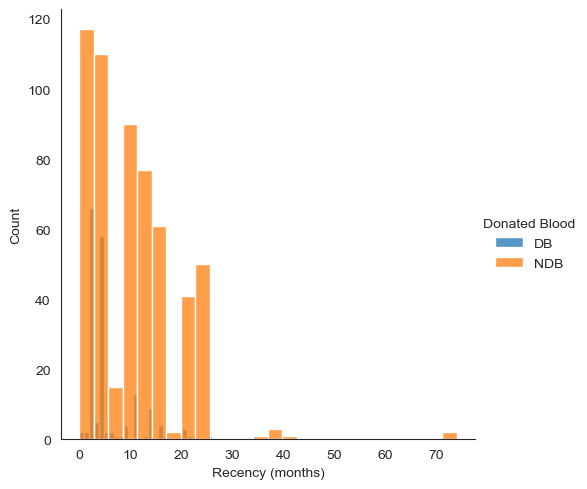

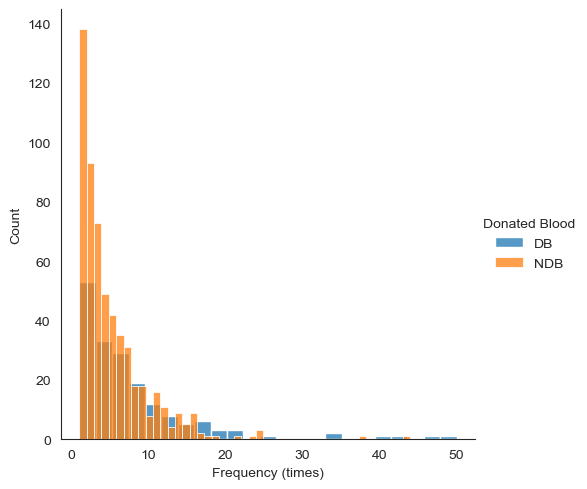

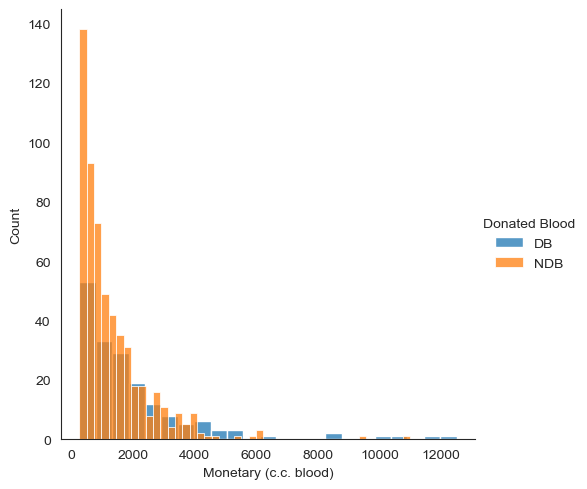

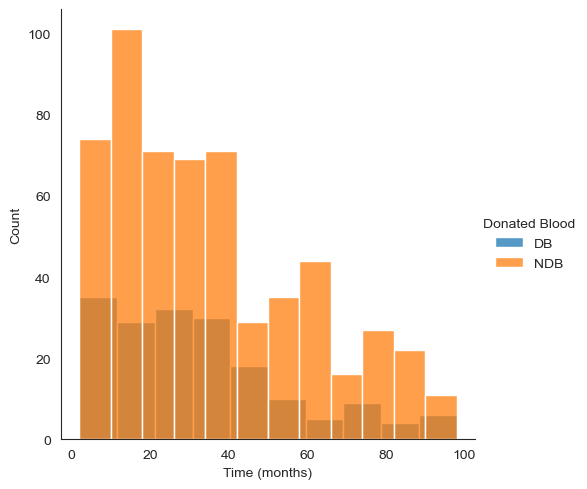

In [17]:
columns_to_plot = [col for col in blood_transfusion.columns if col != 'Donated Blood']

# Create a FacetGrid and loop through each column to plot the distributions
for col in columns_to_plot:
    grid = sns.FacetGrid(blood_transfusion, hue='Donated Blood', height=5)
    grid.map(sns.histplot, col)
    grid.add_legend()
    plt.show()


CDF(Cumulative Distribution Function)

[0.39325843 0.36516854 0.01685393 0.02808989 0.07303371 0.05617978
 0.02808989 0.00561798 0.02808989 0.00561798]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26. ]
***********************************************************
[0.41578947 0.30175439 0.18245614 0.0877193  0.00175439 0.00701754
 0.         0.         0.         0.00350877]
[ 0.   7.4 14.8 22.2 29.6 37.  44.4 51.8 59.2 66.6 74. ]


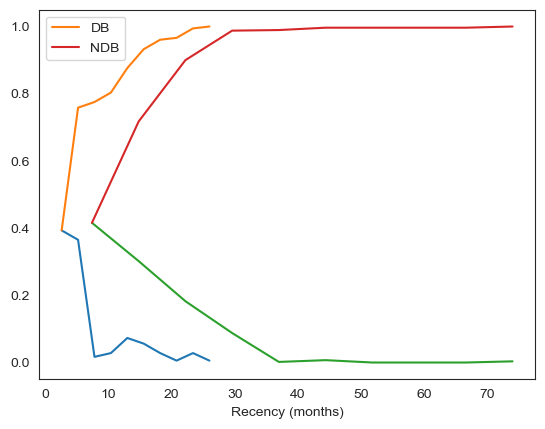

In [19]:
counts1, bin_edges1 = np.histogram(blood_transfusion_DB["Recency (months)"], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'DB')
plt.xlabel('Recency (months)')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(blood_transfusion_NDB["Recency (months)"], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'NDB')
plt.xlabel('Recency (months)')
plt.legend()
plt.show()

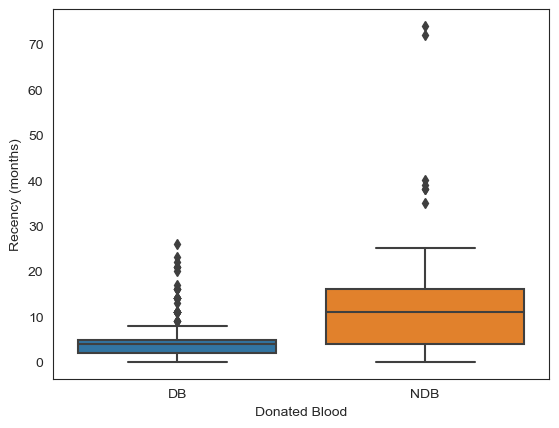

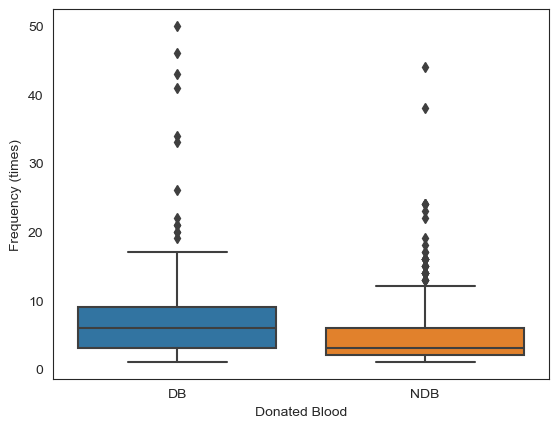

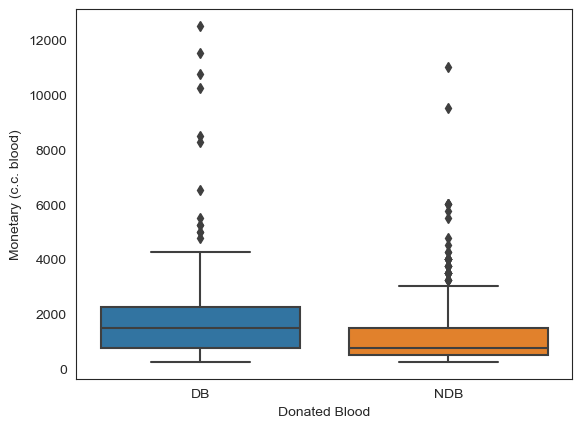

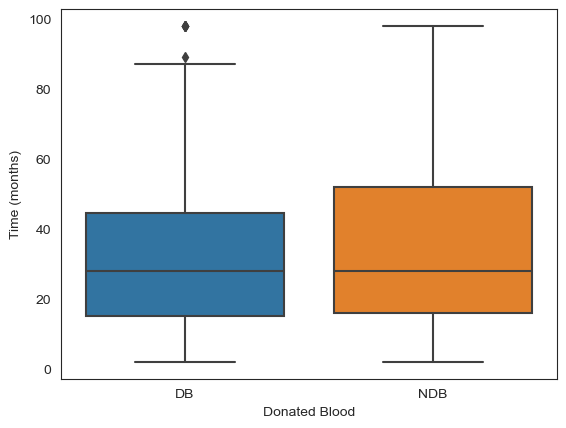

In [18]:
sns.boxplot(x='Donated Blood',y='Recency (months)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Frequency (times)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Monetary (c.c. blood)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Time (months)',data=blood_transfusion)
plt.show()

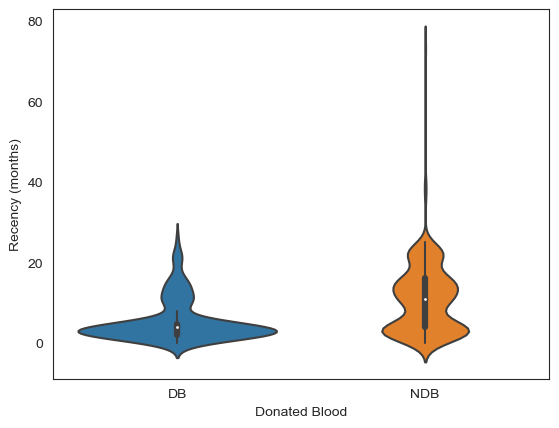

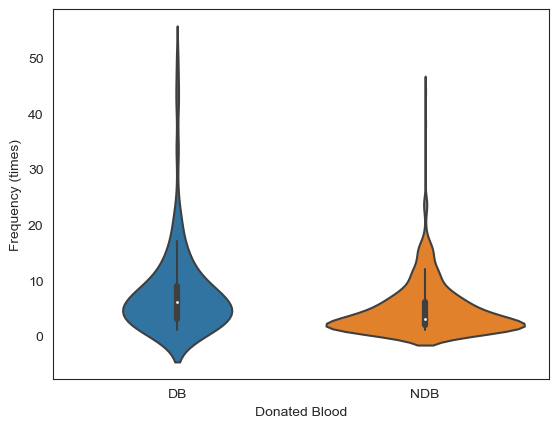

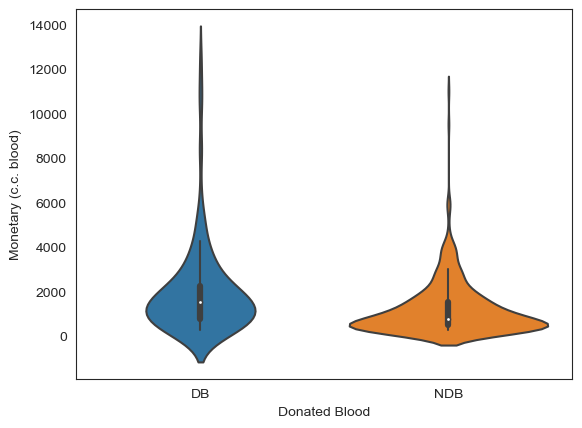

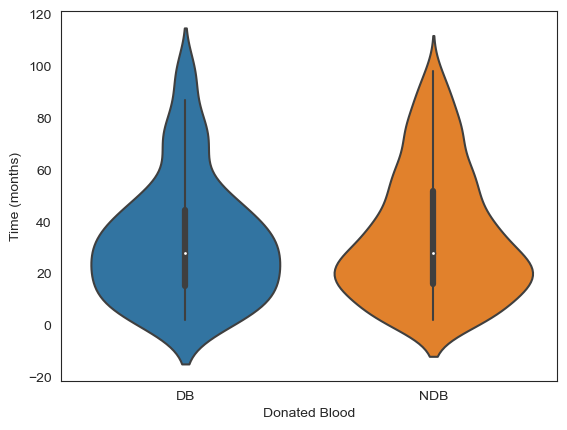

In [20]:
sns.violinplot(x='Donated Blood',y='Recency (months)',data=blood_transfusion)
plt.show()
sns.violinplot(x='Donated Blood',y='Frequency (times)',data=blood_transfusion)
plt.show()
sns.violinplot(x='Donated Blood',y='Monetary (c.c. blood)',data=blood_transfusion)
plt.show()
sns.violinplot(x='Donated Blood',y='Time (months)',data=blood_transfusion)
plt.show()

#### Scatter Plots

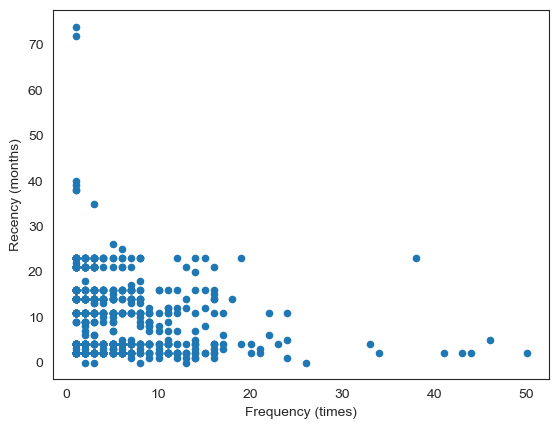

In [24]:
blood_transfusion.plot(y='Recency (months)', x='Frequency (times)',kind='scatter');
plt.show()

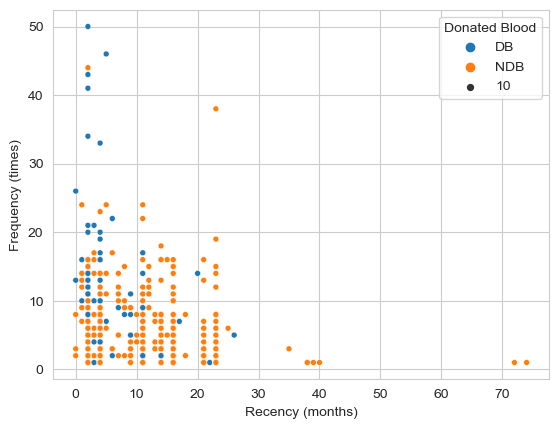

In [30]:
sns.set_style("whitegrid")

# Create the scatter plot
scatter = sns.scatterplot(data=blood_transfusion, x='Recency (months)', y='Frequency (times)', hue='Donated Blood', size=10)

# Add a legend
scatter.legend(title='Donated Blood', loc='upper right')

# Show the plot
plt.show()

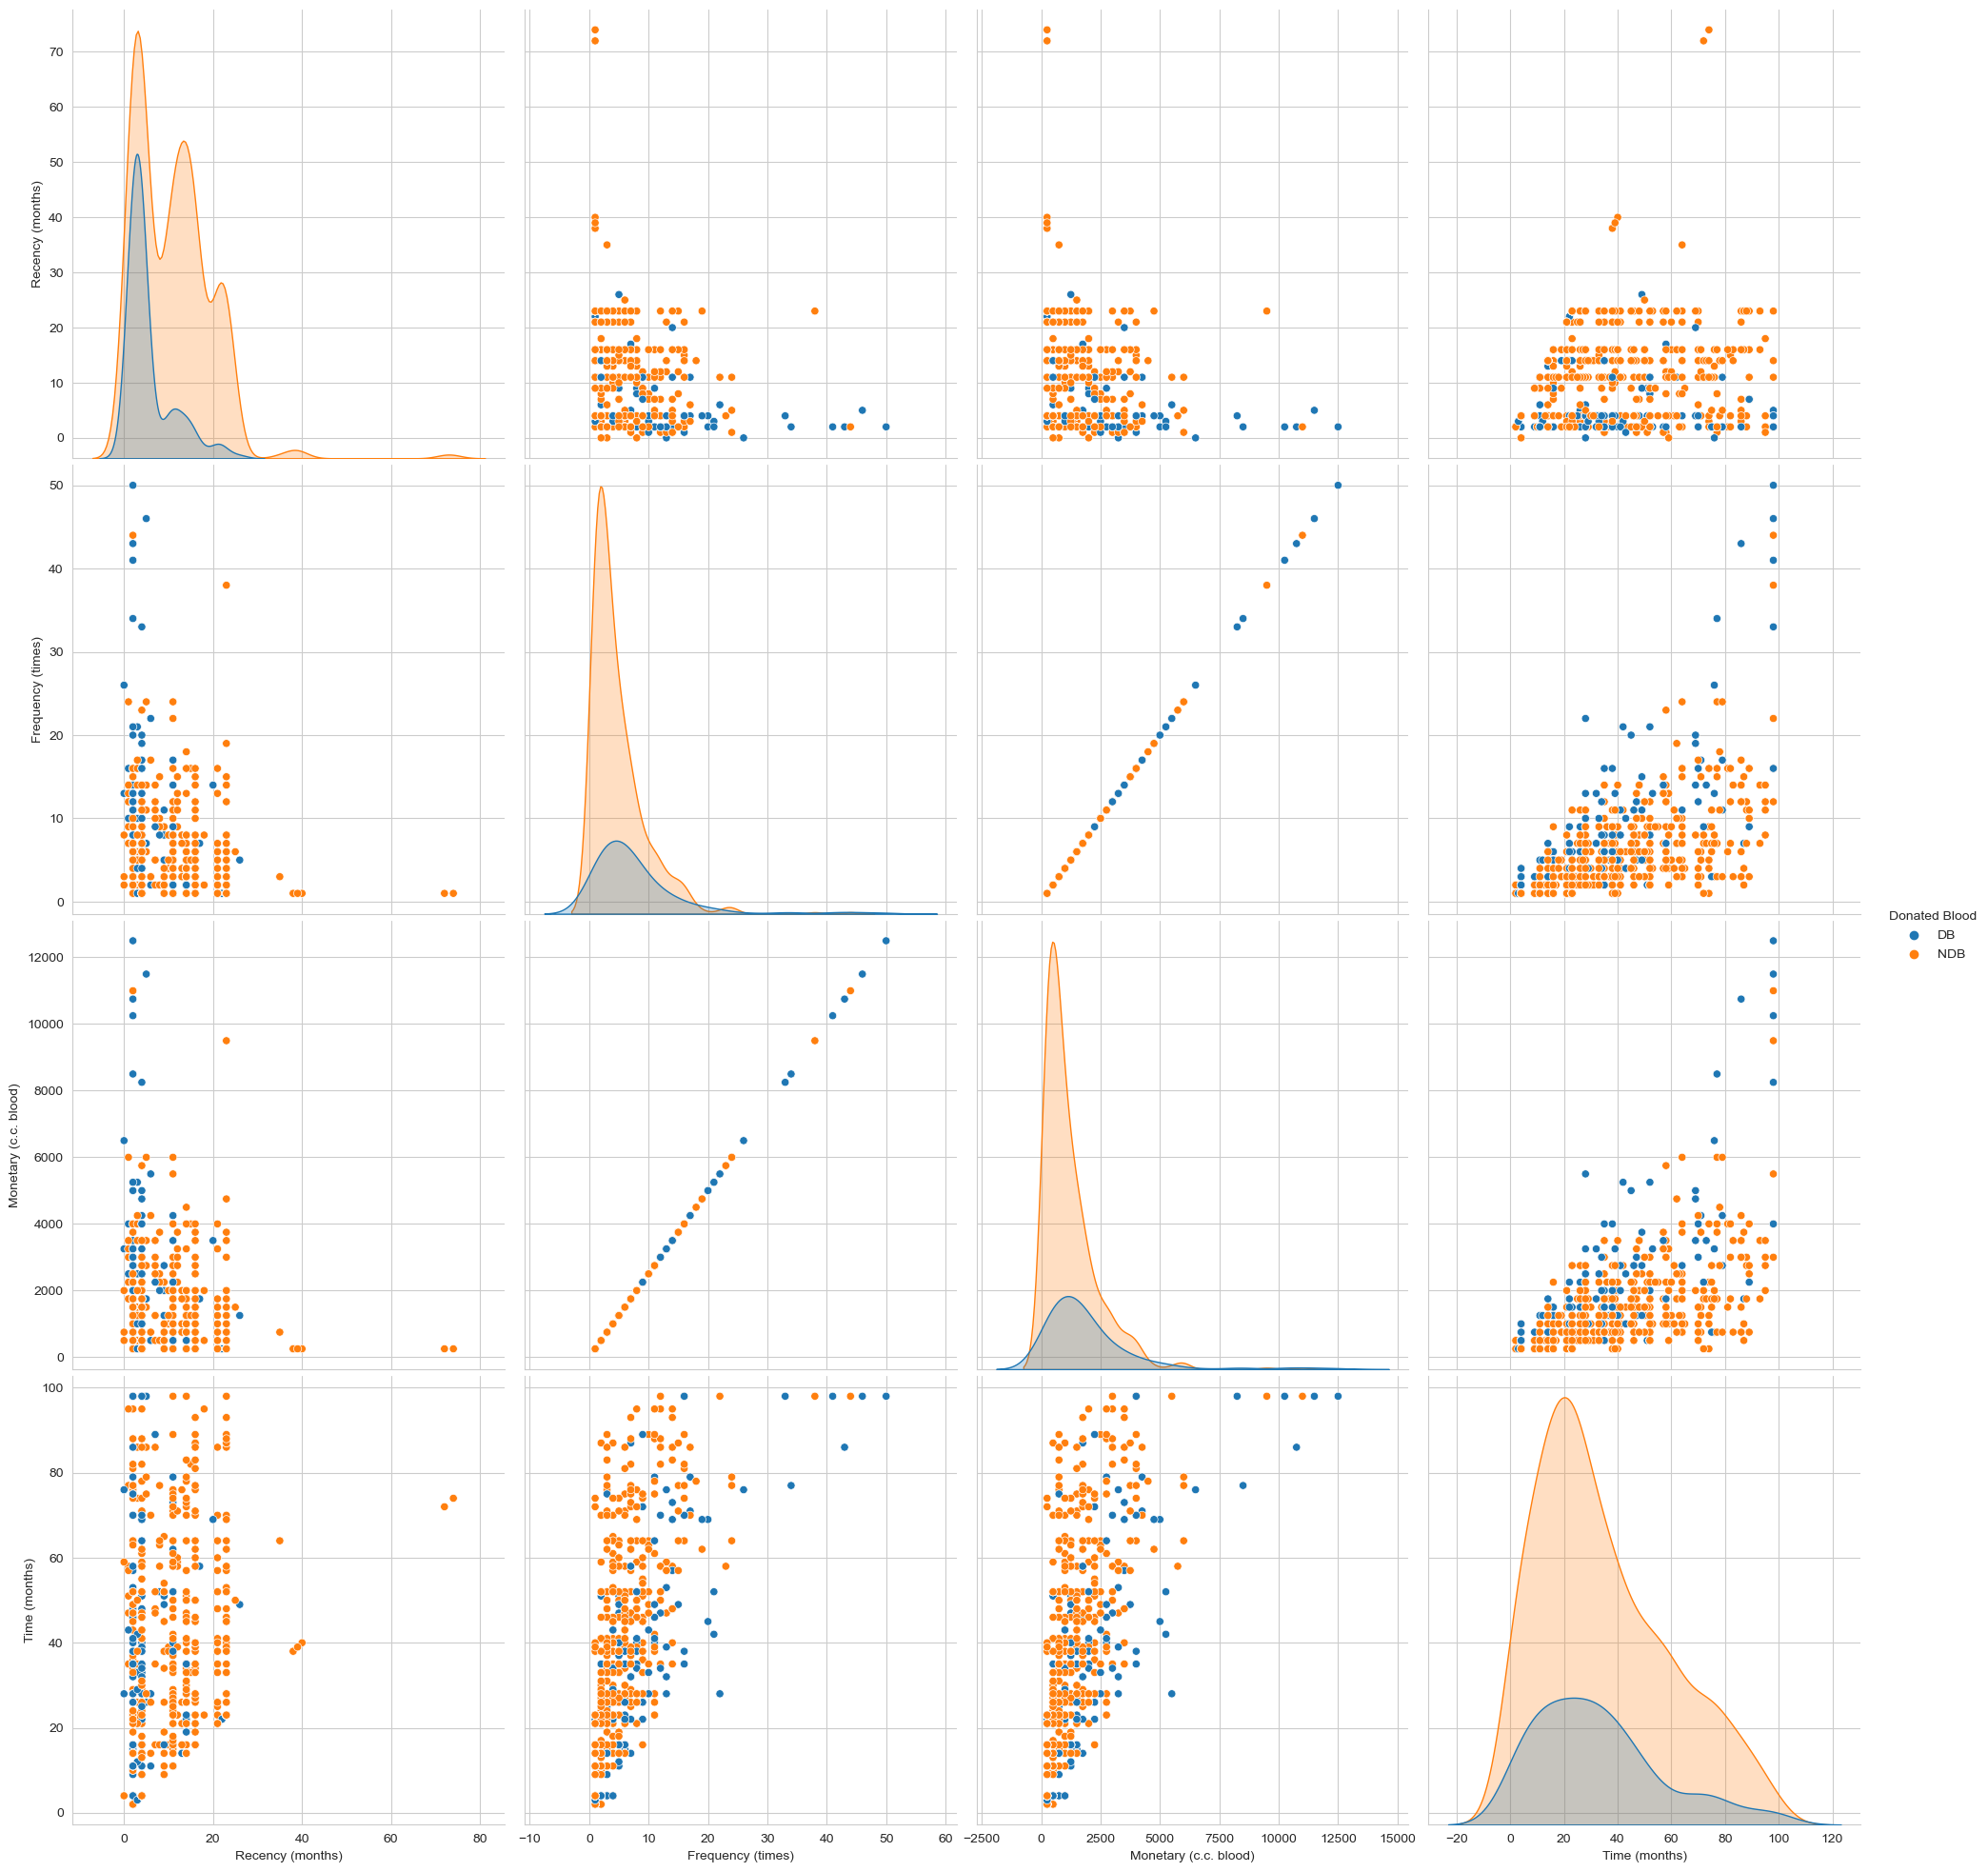

In [31]:
sns.set_style("whitegrid")
sns.pairplot(blood_transfusion, hue="Donated Blood", height = 5)
plt.show()

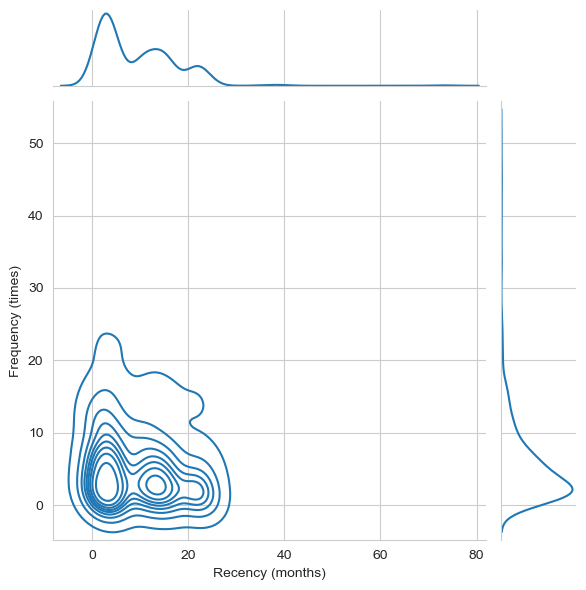

In [32]:
sns.jointplot(x= 'Recency (months)',kind = 'kde', y='Frequency (times)', data = blood_transfusion)
plt.show()

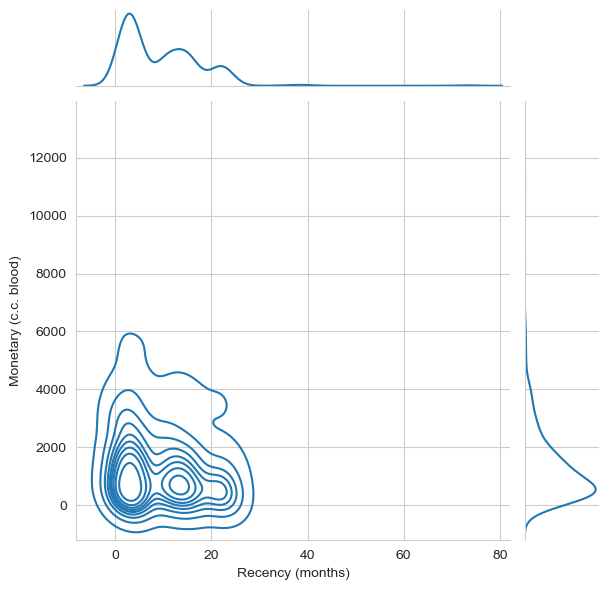

In [33]:
sns.jointplot(x= 'Recency (months)',kind = 'kde', y='Monetary (c.c. blood)', data = blood_transfusion)
plt.show()

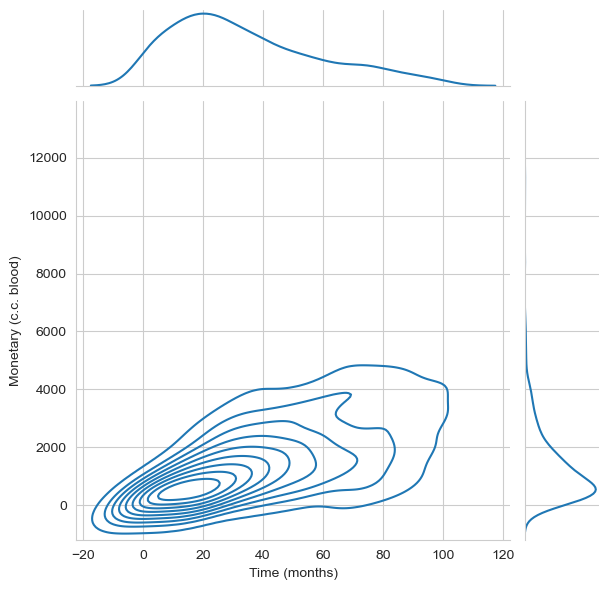

In [38]:
sns.jointplot(x= 'Time (months)',kind = 'kde', y='Monetary (c.c. blood)', data = blood_transfusion)
plt.show()